In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import itertools
from matplotlib.colors import Normalize, LogNorm
import matplotlib.colors

sys.path.append("..")

In [2]:
from manage_data import (get_conditions, load_result, delete_all, delete_result,
                         get_drag_by_velocity, get_std_by_velocity, get_log_scale)

In [14]:
# delete_all()

setting deleted: 0, data deleted: 1900


In [4]:
ensemble = 250000

df = load_result(conditions=get_conditions(
    N_particle = 1,
    N_ensemble = ensemble,
    velocity = None,
    Lambda = None,
    boundary = None,
    N_bins = None,
    gamma = None,
    slope = None,
    temperature = None,
    tau = None,
    Da = None,
    delta_t = None,
    initial = None,
    sampling = 100000,
    )
)

df

,key,N_particle,N_ensemble,velocity,Lambda,boundary,N_bins,gamma,slope,temperature,tau,Da,delta_t,initial,sampling,drag,time
477,14c317,1,250000,10.000,0.001,3.0,40,1.0,0.001000,1.0,5.0,5.0,0.001,10000,100000,"[2.0, 3.0, -1.0, 18.0, 7.0, 0.0, -3.0, 6.0, 7....",1196.596292
1814,e6e9ad,1,250000,10.000,0.001,3.0,40,1.0,0.001259,1.0,5.0,5.0,0.001,10000,100000,"[0.0, 3.0, -7.0, 1.0, 5.0, 4.0, 9.0, 5.0, -5.0...",1182.037808
1456,b69531,1,250000,10.000,0.001,3.0,40,1.0,0.001585,1.0,5.0,5.0,0.001,10000,100000,"[-7.0, 2.0, 2.0, -2.0, 5.0, -16.0, -12.0, 0.0,...",1205.040634
319,d49e75,1,250000,10.000,0.001,3.0,40,1.0,0.001995,1.0,5.0,5.0,0.001,10000,100000,"[0.0, -9.0, 2.0, -2.0, 2.0, 13.0, 1.0, 5.0, 0....",1209.894648
1668,4a8286,1,250000,10.000,0.001,3.0,40,1.0,0.002512,1.0,5.0,5.0,0.001,10000,100000,"[12.0, 3.0, 5.0, 7.0, 9.0, 9.0, 0.0, 5.0, -4.0...",1257.342691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,80112f,1,250000,0.001,1.000,3.0,40,1.0,10.000000,1.0,5.0,5.0,0.001,10000,100000,"[1315.0, -322.0, -2129.0, 73.0, 1344.0, 3067.0...",1137.036225
1142,485a05,1,250000,0.010,1.000,3.0,40,1.0,10.000000,1.0,5.0,5.0,0.001,10000,100000,"[1857.0, 1342.0, -2341.0, 787.0, -269.0, 3395....",1166.990540
1164,9f672d,1,250000,3.000,1.000,3.0,40,1.0,10.000000,1.0,5.0,5.0,0.001,10000,100000,"[25132.0, 21537.0, 22053.0, 22379.0, 24286.0, ...",1232.711440
1882,0cad3d,1,250000,0.300,1.000,3.0,40,1.0,10.000000,1.0,5.0,5.0,0.001,10000,100000,"[2106.0, 9641.0, 1785.0, 1886.0, -157.0, 1227....",1184.408507


In [5]:
# delete = df[df["size"] == 128]
delete = df
print(list(delete["key"]))
print(len(list(delete["key"])))
# delete_result(list(delete["key"]))

['14c317', 'e6e9ad', 'b69531', 'd49e75', '4a8286', 'e1cdeb', '103c1e', '806691', '074a33', 'b34054', '92ec87', '0819fd', '8b6eda', '1a54a5', '967037', '9ca96d', '0815cf', '27774a', 'db0309', '05cab8', 'ceb7ec', '18e54b', '6c4e6a', '5d1711', '20218a', '9d22a5', 'a9bee4', '7bbde5', '771b6e', 'd9be7c', 'f49739', '6fa874', 'e29409', '762b54', '94e7f4', 'ae5dfd', 'de226c', '89c011', 'bfee73', 'f94482', 'a4da9f', 'd9434d', '084519', 'ddac35', 'b266ce', '247843', '963c54', 'ff66f3', 'b040af', '08d418', 'e7159e', 'fa73e6', 'ec9233', '45e602', 'ca5d45', '0aefe5', 'd90fa8', '024300', '7e41dc', 'b18534', 'd5e1ec', 'dd487e', '30e280', 'b45b17', 'd92e10', '447b34', '056b89', 'a29a70', '9176bf', 'cc88b0', 'c6e69f', '258e1a', 'e4dfcd', '02c528', '7d9e9a', '267ea8', '2b6835', '831950', '7ac773', '16cb0d', 'ee3824', 'eadb63', '8c2ba3', '795121', '042c08', 'e486a6', '44d016', 'ade856', '034aa2', 'd3b301', '8a3f22', '0de641', '2362bd', '80faba', 'c3f7ab', '20698d', '5b3066', '60b215', 'b4a8c6', 'd7ffcf',

In [6]:
available_slope, available_Lambda, available_velocity = sorted(
    set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy())), sorted(set(df["velocity"].to_numpy()))
print(f"data = {len(available_slope)} x {len(available_Lambda)} x {len(available_velocity)} = {len(available_slope)*len(available_Lambda)*len(available_velocity)}")
print(f"slope = {available_slope}")
print(f"Lambda = {available_Lambda}")
print(f"velocity = {available_velocity}")

data = 41 x 8 x 9 = 2952
slope = [0.001, 0.001259, 0.001585, 0.001995, 0.002512, 0.003162, 0.003981, 0.005012, 0.00631, 0.007943, 0.01, 0.01259, 0.01585, 0.01995, 0.02512, 0.03162, 0.03981, 0.05012, 0.0631, 0.07943, 0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0, 1.259, 1.585, 1.995, 2.512, 3.162, 3.981, 5.012, 6.31, 7.943, 10.0]
Lambda = [0.001, 0.001259, 0.001585, 0.3981, 0.5012, 0.631, 0.7943, 1.0]
velocity = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0]


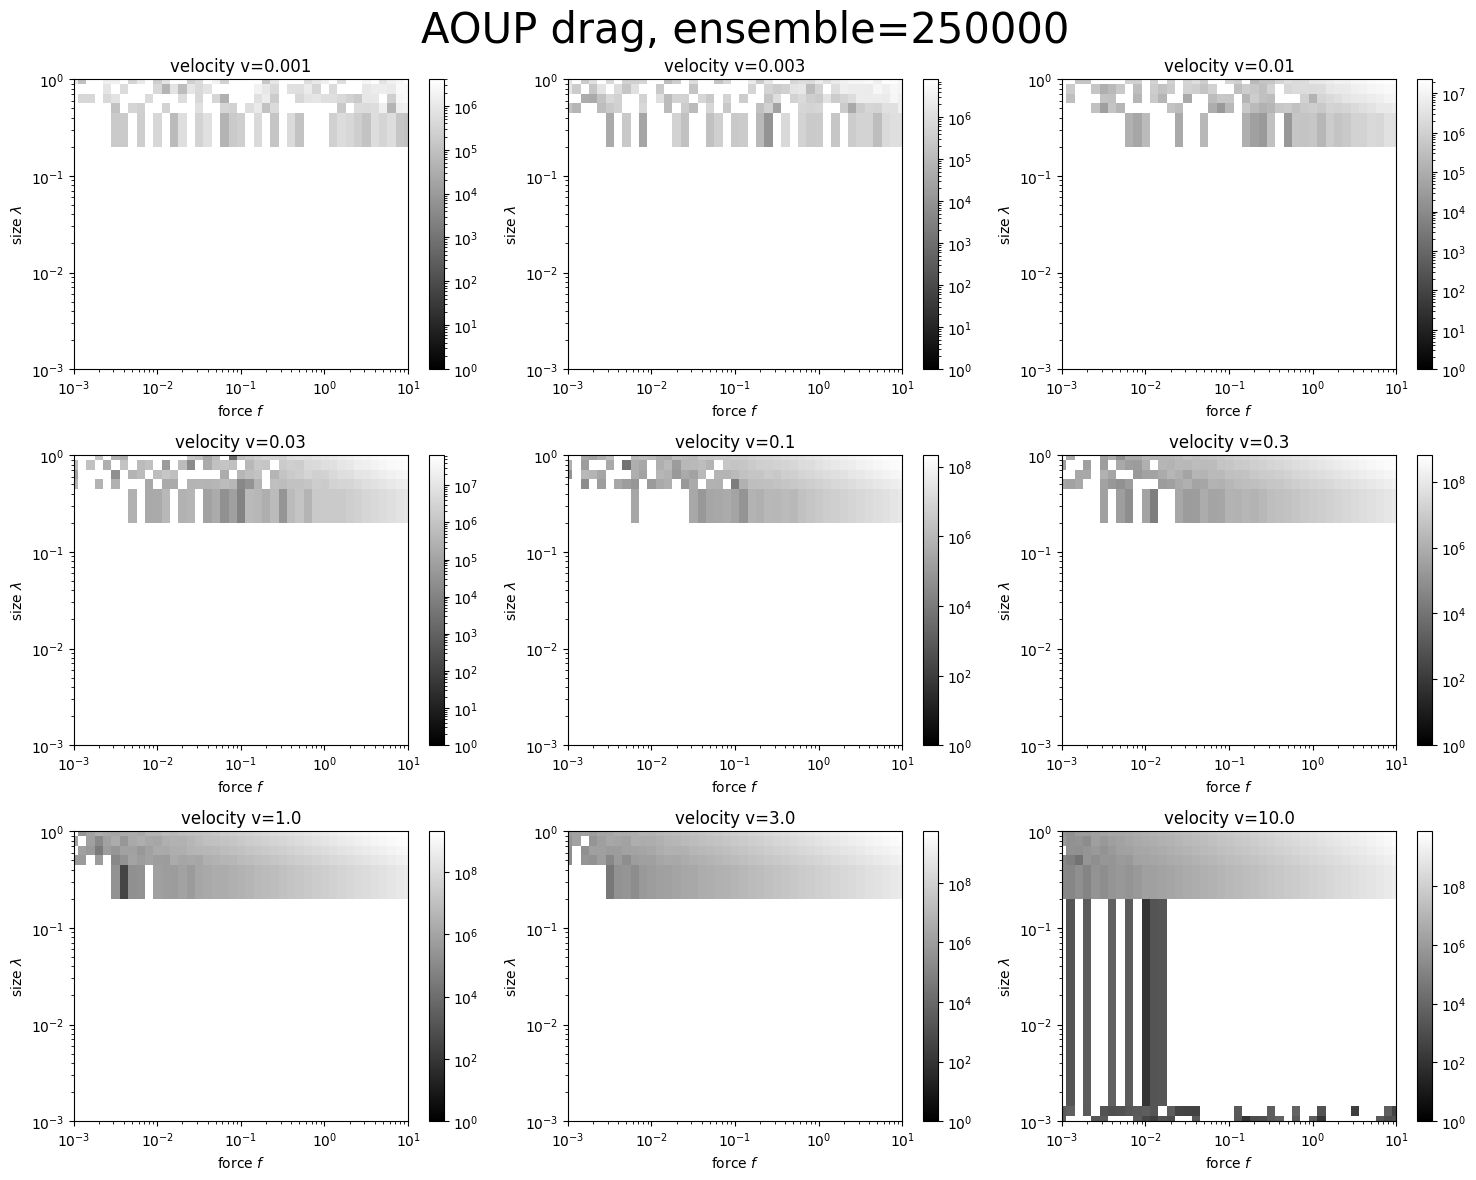

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(15,12))
fig.suptitle(f"AOUP drag, ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity = available_velocity[i]
    
    drag = get_drag_by_velocity(df, velocity=velocity)
    # print(np.log10(drag.max()), np.log10(-drag.min()))

    c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
                    norm=LogNorm(vmin=1, vmax=drag.max()), cmap="binary_r")
    # c = ax.pcolor(x, y, average, shading="auto",
    #                norm=Normalize(vmin=average.min(), vmax=0.0), cmap="bone")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim([1.e-3, 1.e1])
    ax.set_ylim([1.e-3, 1])

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")

    cbar = plt.colorbar(c)

fig.tight_layout()
# plt.savefig(f"./fig/AOUP drag, ensemble={ensemble}.jpg")
plt.show()

/pds/pds31/sungbinlee/Research/AOUP/manage_data.py:193: RuntimeWarning: invalid value encountered in divide
  pm_flag = drag/np.abs(drag)
/pds/pds31/sungbinlee/Research/AOUP/manage_data.py:194: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(np.abs(drag))


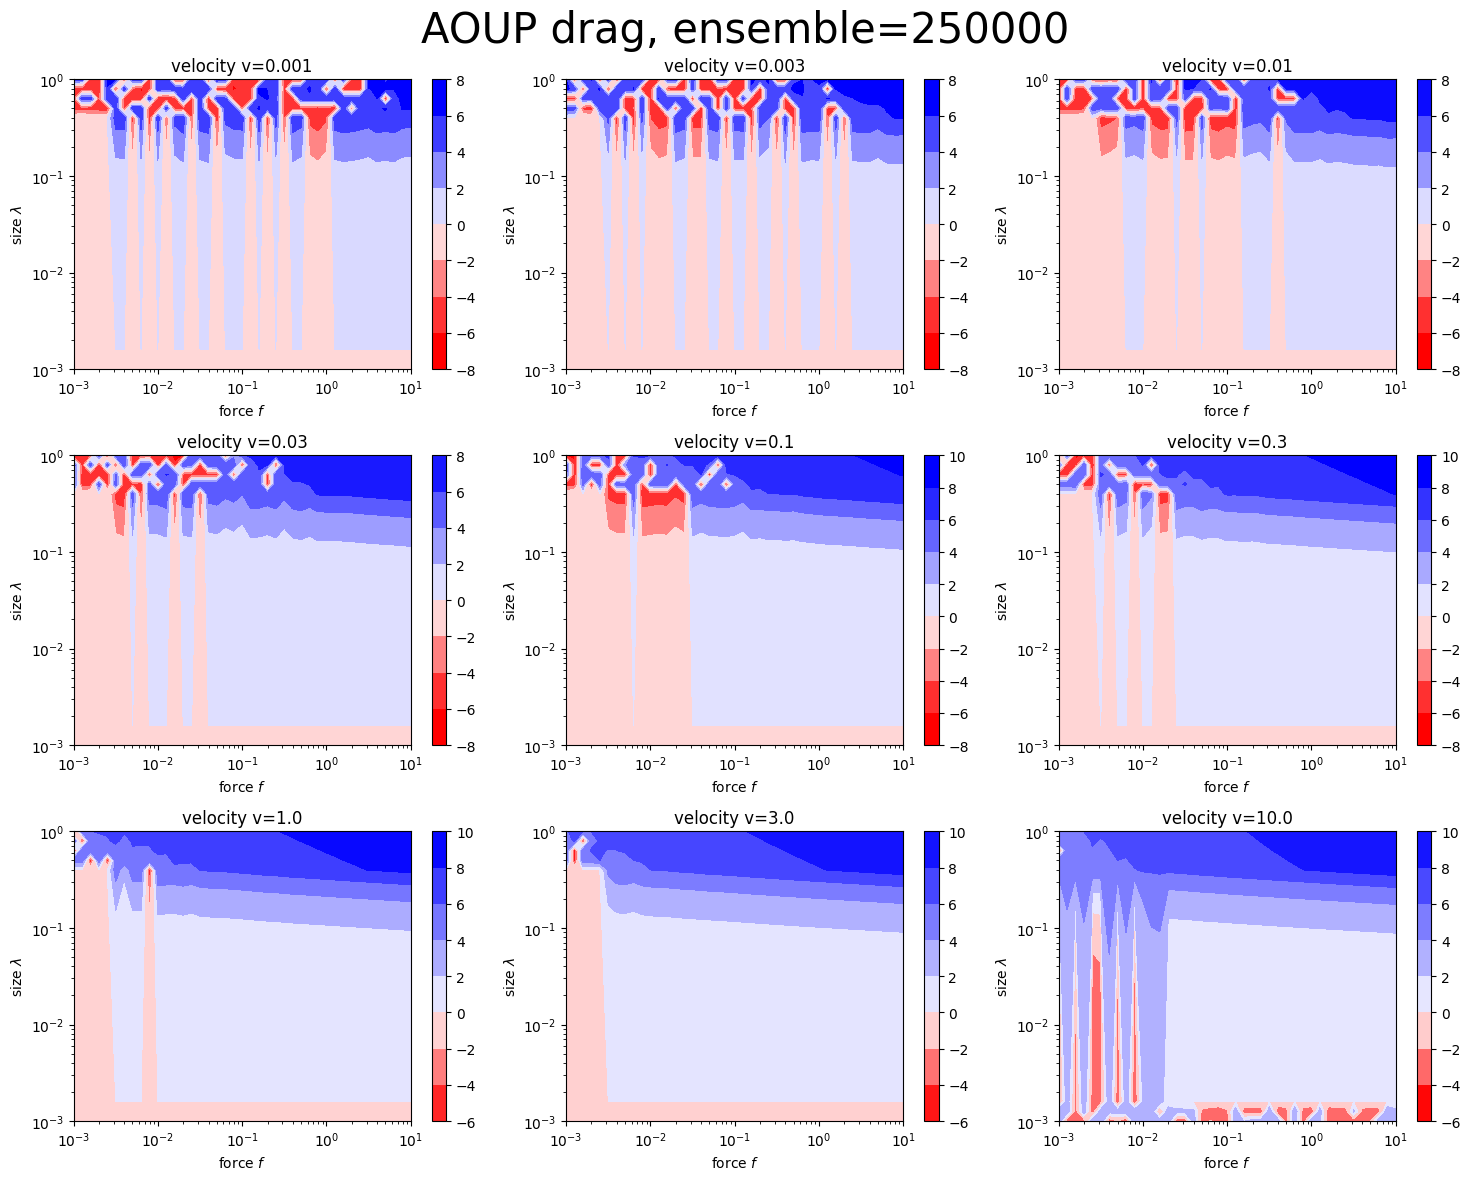

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(15,12))
fig.suptitle(f"AOUP drag, ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity = available_velocity[i]

    data = get_log_scale(df, velocity=velocity)

    cvals  = [data.min(), 0, data.max()]
    colors = ["red","white","blue"]
    norm = plt.Normalize(min(cvals),max(cvals))
    tuples = list(zip(map(norm,cvals), colors))
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

    c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
    # c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim([1.e-3, 1.e1])
    ax.set_ylim([1.e-3, 1])

    cbar = plt.colorbar(c)

fig.tight_layout()
plt.savefig(f"./fig/AOUP drag, ensemble={ensemble}.jpg")
plt.show()

/tmp/ipykernel_1507250/1022201050.py:12: RuntimeWarning: invalid value encountered in divide
  Z = drag / std


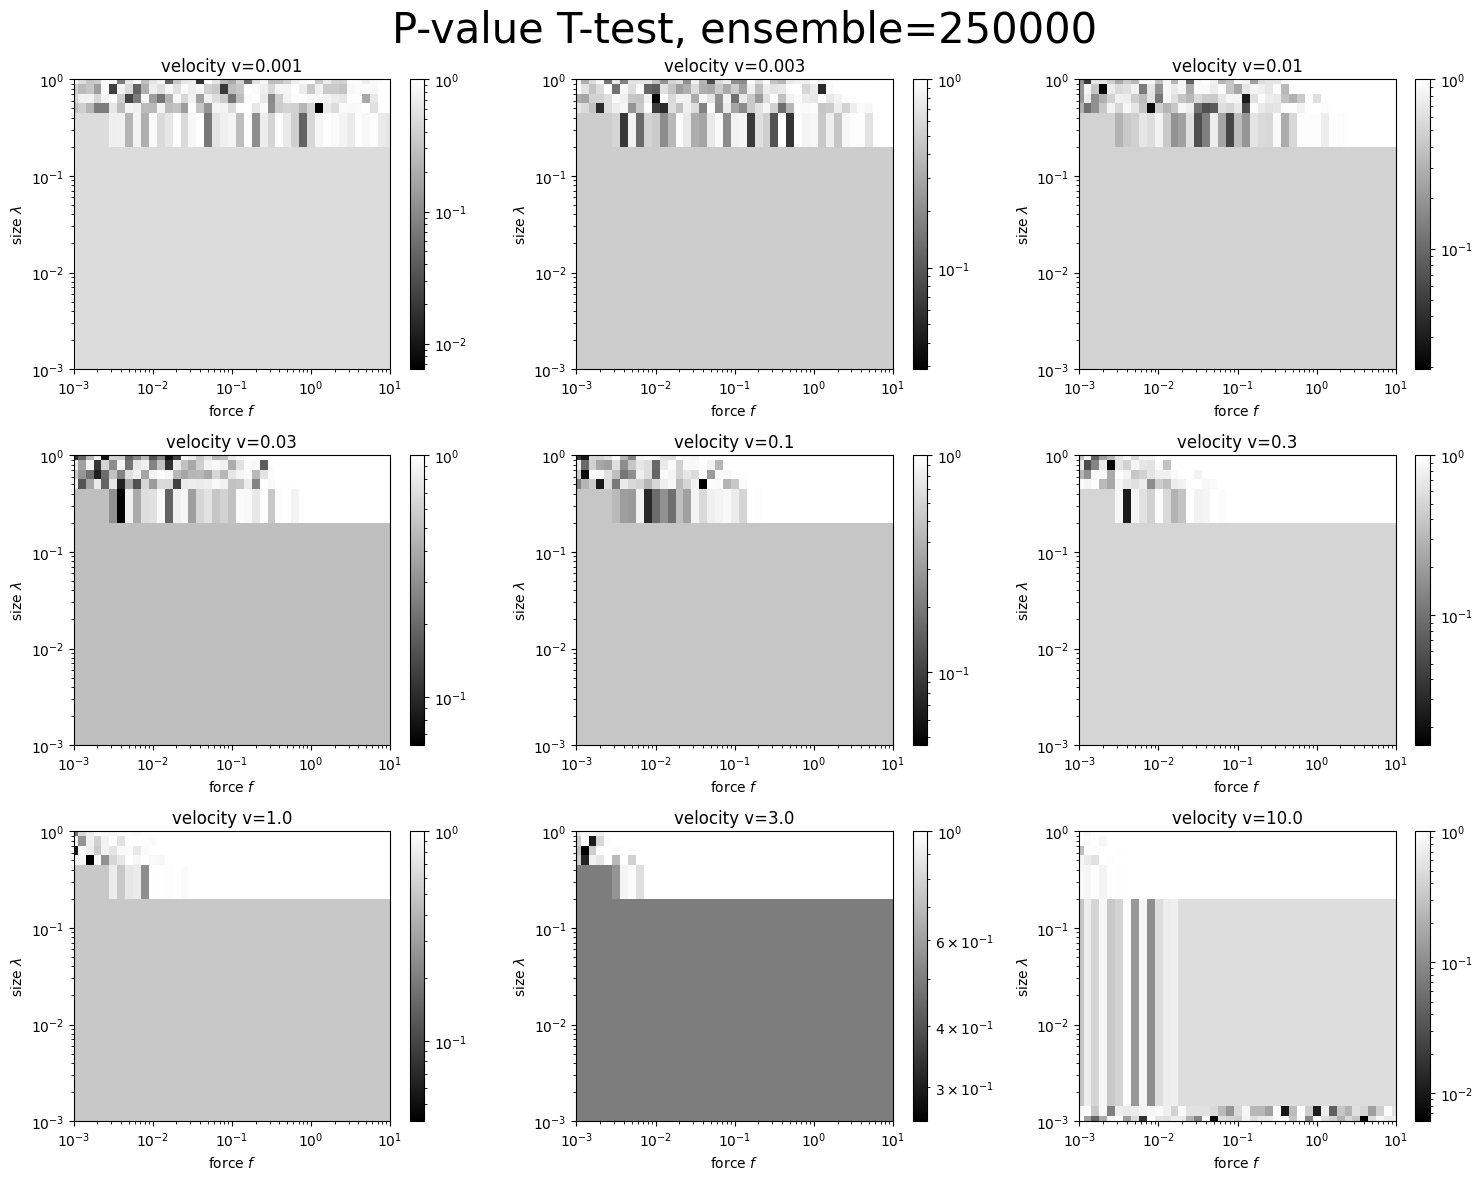

In [9]:
from scipy.stats import norm

fig, axs = plt.subplots(3, 3, figsize=(15,12))
fig.suptitle(f"P-value T-test, ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity=available_velocity[i]

    drag = get_drag_by_velocity(df, velocity=velocity)
    std = get_std_by_velocity(df, velocity=velocity)

    Z = drag / std
    Z[np.isnan(Z)] = 0.0

    p_value = norm.cdf(Z)
    # print(p_value)
    # print(p_value.min())

    # c = ax.contourf(available_slope, available_Lambda, p_value,
    #             norm=LogNorm(vmin=p_value.min(), vmax=1), cmap="binary_r")
    c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
                norm=LogNorm(vmin=p_value.min(), vmax=1), cmap="binary_r")

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim([1.e-3, 1.e+1])
    ax.set_ylim([1.e-3, 1])

    cbar = plt.colorbar(c)

fig.tight_layout()
plt.savefig(f"./fig/T-Test p-value, ensemble={ensemble}.jpg")
plt.show()

In [10]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# import matplotlib.colors

# X = np.linspace(0, 10, 100)
# Y = np.linspace(0, 10, 100)
# X, Y = np.meshgrid(X, Y)

# rng = np.random.default_rng()
# energy = 2 * rng.random([100,100,10]) - 1

# fig = plt.figure(figsize=(10,20))
# # ax = fig.add_subplot(projection='3d')
# ax = plt.axes([0, -1, 1, 2],projection='3d')
# norm = matplotlib.colors.Normalize(vmin=np.min(energy),vmax=np.max(energy))

# for n, z in enumerate(list(np.linspace(0,10,10))):
#     Z = np.zeros_like(X)+z
#     ax.plot_surface(X, Y, Z, facecolors = cm.coolwarm(norm(energy[:,:,n])));

# ax.set_box_aspect((1, 1, 4))

# plt.show()

9.310035025536223 5.9445833378397195


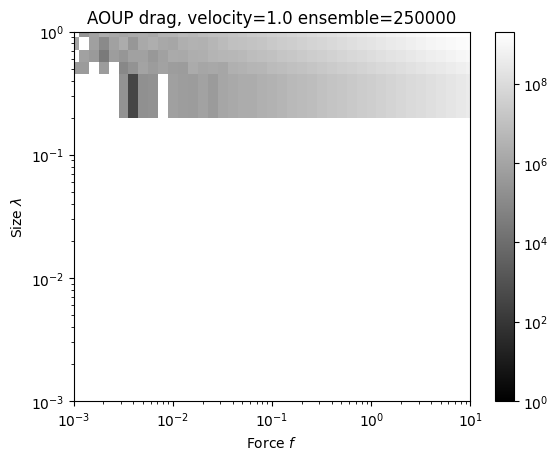

In [11]:
fig, ax = plt.subplots()
velocity = 1.0

drag = get_drag_by_velocity(df, velocity=velocity)
print(np.log10(drag.max()), np.log10(-drag.min()))

c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
                  norm=LogNorm(vmin=1, vmax=drag.max()), cmap="binary_r")
# c = ax.pcolor(x, y, average, shading="auto",
#                norm=Normalize(vmin=average.min(), vmax=0.0), cmap="bone")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1.e-3, 1.e1])
ax.set_ylim([1.e-3, 1])

ax.set_title(f"AOUP drag, velocity={velocity} ensemble={ensemble}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")

cbar = plt.colorbar(c)
plt.show()

/pds/pds31/sungbinlee/Research/AOUP/manage_data.py:193: RuntimeWarning: invalid value encountered in divide
  pm_flag = drag/np.abs(drag)
/pds/pds31/sungbinlee/Research/AOUP/manage_data.py:194: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(np.abs(drag))


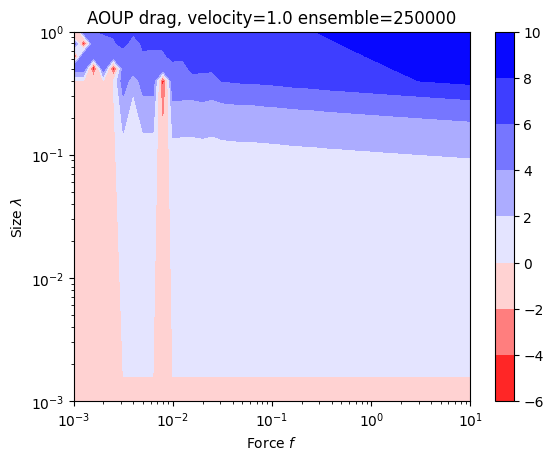

In [12]:
fig, ax = plt.subplots()

data = get_log_scale(df, velocity=velocity)

cvals  = [data.min(), 0, data.max()]
colors = ["red","white","blue"]
norm = plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
# c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)

ax.set_title(f"AOUP drag, velocity={velocity} ensemble={ensemble}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1.e-3, 1.e1])
ax.set_ylim([1.e-3, 1])

cbar = plt.colorbar(c)
# plt.savefig(f"./fig/AOUP drag, velocity={velocity}, ensemble={ensemble}.jpg")
plt.show()

/tmp/ipykernel_1507250/2087789733.py:6: RuntimeWarning: invalid value encountered in divide
  Z = drag / std


0.041558816228617325


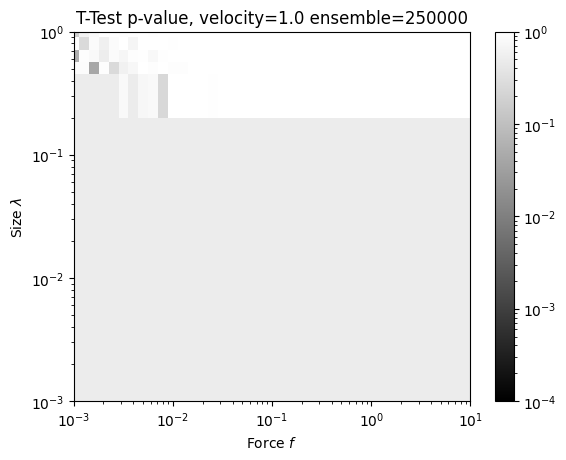

In [13]:
from scipy.stats import norm

drag = get_drag_by_velocity(df, velocity=velocity)
std = get_std_by_velocity(df, velocity=velocity)

Z = drag / std
Z[np.isnan(Z)] = 0.0

p_value = norm.cdf(Z)
# print(p_value)
print(p_value.min())

fig, ax = plt.subplots()

# c = ax.contourf(available_slope, available_Lambda, p_value, shading='auto',
#                norm=LogNorm(vmin=1.e-4, vmax=1), cmap="binary_r")
c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
               norm=LogNorm(vmin=1.e-4, vmax=1), cmap="binary_r")

ax.set_title(f"T-Test p-value, velocity={velocity} ensemble={ensemble}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1.e-3, 1.e+1])
ax.set_ylim([1.e-3, 1])

cbar = plt.colorbar(c)
# plt.savefig(f"./fig/T-Test p-value, velocity={velocity}, ensemble={ensemble}.jpg")
plt.show()